In [1]:
%matplotlib inline

import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2)

In [37]:
def model(activation_function, dropout_rate, number_of_epoch):
    
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=activation_function),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation='softmax')
])
      
        
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    hist = model.fit(x=x_train, y=y_train, validation_data=(x_validation, y_validation), epochs=number_of_epoch)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    
    
    return test_acc, hist
    

In [32]:
def plot(H, N):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Accuracy on Traning Data and Validation Data")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")

In [6]:
model('relu', 0.2, 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 9.6180 - accuracy: 0.5596
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9874 - accuracy: 0.6412
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9254 - accuracy: 0.6610
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8732 - accuracy: 0.6624
Epoch 5/5
375/375 [==============================] - 0s 712us/step - loss: 0.6982 - accuracy: 0.7291


0.7290833592414856

In [7]:
model('relu', 0, 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 12.9342 - accuracy: 0.6691
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7235 - accuracy: 0.7261
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6277 - accuracy: 0.7647
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5598 - accuracy: 0.7961
Epoch 5/5
375/375 [==============================] - 0s 721us/step - loss: 0.5621 - accuracy: 0.8162


0.8161666393280029

### Sigmoiad Activation Function

In [34]:
accuracy, h = model('sigmoid', 0, 30)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2849 - accuracy: 0.5663 - val_loss: 0.7728 - val_accuracy: 0.6985
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8107 - accuracy: 0.6838 - val_loss: 0.8030 - val_accuracy: 0.6942
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8013 - accuracy: 0.6850 - val_loss: 0.7478 - val_accuracy: 0.7055
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7453 - accuracy: 0.7136 - val_loss: 0.7375 - val_accuracy: 0.7135
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7290 - accuracy: 0.7169 - val_loss: 0.7043 - val_accuracy: 0.7390
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7238 - accuracy: 0.7146 - val_loss: 0.7125 - val_accuracy: 0.7133
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7392 - accuracy: 0.6995 - val_loss: 0.7560 - val_accuracy:

In [35]:
accuracy

0.7599999904632568

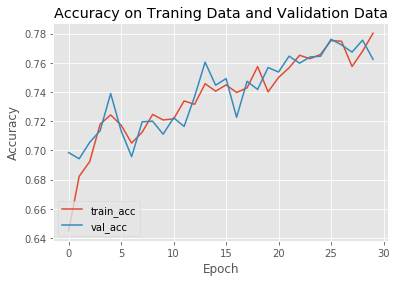

In [39]:
plot(h, 30)

### Relu Activation Function

In [40]:
accuracy, h = model('relu', 0, 30)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 10.9080 - accuracy: 0.6598 - val_loss: 0.8221 - val_accuracy: 0.6933
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7872 - accuracy: 0.7058 - val_loss: 0.7112 - val_accuracy: 0.7444
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6236 - accuracy: 0.7667 - val_loss: 0.6634 - val_accuracy: 0.7413
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5823 - accuracy: 0.7853 - val_loss: 0.5834 - val_accuracy: 0.8008
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5292 - accuracy: 0.8132 - val_loss: 0.5129 - val_accuracy: 0.8229
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5140 - accuracy: 0.8198 - val_loss: 0.6205 - val_accuracy: 0.7962
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5234 - accuracy: 0.8180 - val_loss: 0.5724 - val_accuracy

In [41]:
accuracy

0.8077999949455261

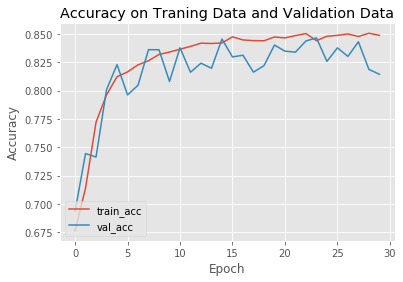

In [42]:
plot(h, 30)

با توجه به دقت نهایی مدل روی داده تست و نمودار واضح است که تابع فعال ساز دوم بهتر عمل می کند.
در نمودار اول مشاهده میکنیم که در برخی از اپوک ها دقت در داده ی راستی ازمایی از دقت در داده ی آموزش بیشتر است این به دلیل اندرفیت مدل است.

### Dropout

In [45]:
accuracy, h = model('relu', 0.2, 30)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 9.0771 - accuracy: 0.5458 - val_loss: 0.9141 - val_accuracy: 0.6353
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.0328 - accuracy: 0.6152 - val_loss: 0.7527 - val_accuracy: 0.6953
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8828 - accuracy: 0.6502 - val_loss: 0.6958 - val_accuracy: 0.7305
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8465 - accuracy: 0.6739 - val_loss: 0.7379 - val_accuracy: 0.7352
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8282 - accuracy: 0.6756 - val_loss: 0.6999 - val_accuracy: 0.7347
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7859 - accuracy: 0.6901 - val_loss: 0.6629 - val_accuracy: 0.7482
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7798 - accuracy: 0.6965 - val_loss: 0.7259 - val_accuracy:

In [46]:
accuracy

0.7235999703407288

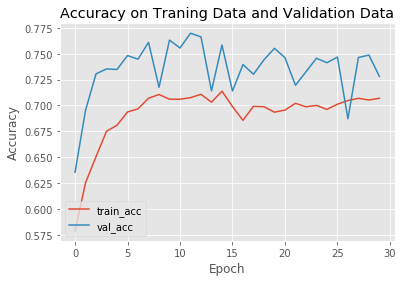

In [47]:
plot (h, 30)

 مشاهده می کنیم که با استفاده از دراپ اوت دقت مدل کاهش میابد که با توجه به ساده بودن شبکه و تعداد نورون های کم ان قابل حدس بود.
 
 همچنین می بینیم که در صورت استفاده از دراپ اوت دقت در داده ی ولیدیشن هموازه بیشتر از دقت در داده اموزش است که این به این دلیل است که دراپ اوت در هنگام اموزش استفاده میشود اما در هنگام تست از دراپ اوت استفاده نمیشود.